In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algoritmer import bfgs
from tensegrity import TensegrityStructure
import tests as TEST
import os
try:
    os.mkdir("../Bilder/")
except FileExistsError:
    print("Directory already created")
    
try:
    os.mkdir("tests")
except FileExistsError:
    print("Directory already created")


Directory already created
Directory already created


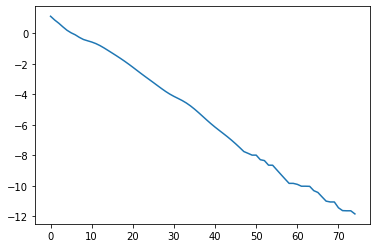

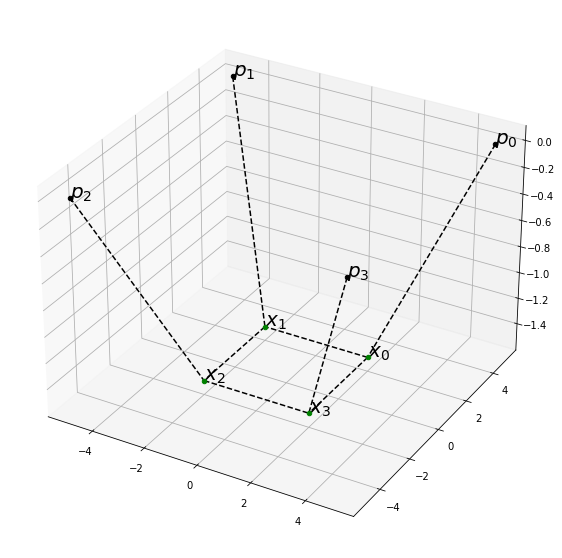

In [2]:
ts =  TEST.P25
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=500, convergence_plot=True)
res = np.reshape(res,(-1, 3))

plt.plot(np.log10(conv))
plt.savefig("../Bilder/P25conv.pdf") # Used in report.
fig, ax = ts.plot(res)
plt.savefig("../Bilder/P25.pdf") # Used in report.
np.save("tests/P25", res)


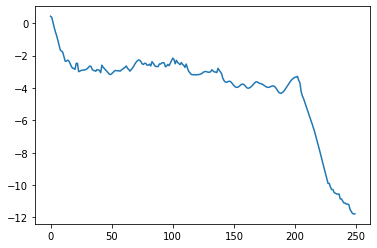

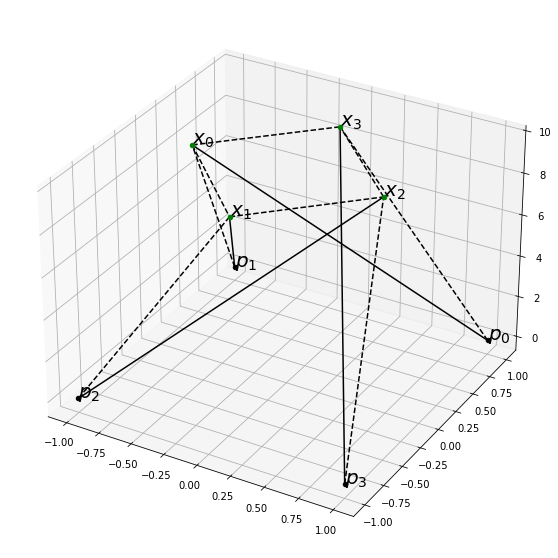

In [3]:
ts =  TEST.P69
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_plot=True)
res = np.reshape(res,(-1, 3))

plt.plot(np.log10(conv))
plt.savefig("../Bilder/P69conv.pdf") # Used in report.
fig, ax = ts.plot(res)
plt.savefig("../Bilder/P69.pdf") # Used in report.
np.save("tests/P69", res)


 0: 1000, 1 
 1: 827, 1.5 
 2: 268, 4.5 
 3: 350, 27.0 
 4: 368, 162.0 
 5: 254, 972.0 
 6: 330, 5832.0 
 7: 509, 34992.0 
 8: 120, 104976.0 
 9: 1000, 1259712.0 
BFGS converged!
Gradient at solution: 
 [[-4.91106579e-13  4.43042546e-16  3.32717674e-13]
 [ 3.02219318e-13 -4.88983853e-14  3.27436073e-13]
 [ 8.21283146e-16  3.68596213e-15  3.27405534e-13]
 [ 4.78913784e-15  2.81849197e-15  3.27465351e-13]
 [-1.26625435e-13 -8.23538286e-15  9.99079292e-14]
 [ 9.18281293e-15  9.68029910e-15 -1.47670071e-13]
 [-4.33926983e-14  1.13624388e-16 -3.15433443e-14]
 [ 2.27443932e-15  2.89097088e-14 -3.12419361e-14]] 
 with norm: 
9.055742779801682e-13

Solution: 
[[-1.80907898e-19 -6.07688819e-21 -5.29274375e-12]
 [-7.01561876e-20  2.00738917e+00 -5.29274383e-12]
 [-2.00738917e+00  2.00738917e+00 -5.29274423e-12]
 [-2.00738917e+00 -5.09577951e-11 -5.29274420e-12]
 [-1.00369466e+00  1.71341383e+00  9.54188267e+00]
 [-1.71341383e+00  1.00369451e+00  9.54188267e+00]
 [-1.00369452e+00  2.93975338e-01 

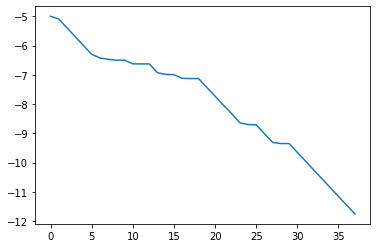

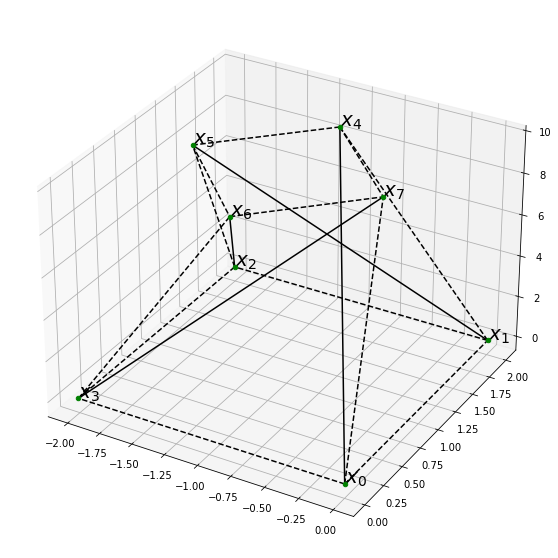

In [4]:
ts = TEST.FREESTANDING
x0 = np.arange(3 * len(ts.free_weights)) * 10

mu = 1
res = x0.copy()

prev = x0
for i in range(10):
    res, num = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f' {i}: {num}, {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)


    if np.linalg.norm(res - prev) < 1e-12:
        break
    prev = res.copy()


res, conv = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000, plot_summary=True, convergence_plot=True)


plt.plot(np.log10(conv))
plt.savefig("../Bilder/freestandingconv.pdf") # Used in report.
fig, ax = ts.plot(res)
plt.savefig("../Bilder/freestanding.pdf") # Used in report.
np.save("tests/freestandingres", res)
np.save("tests/freestandingconv", conv)

